<a href="https://colab.research.google.com/github/ImmanuelNK/Exercise-DATAMINING/blob/main/%5BQuestion%5D_Exercise_Week_4_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

Immanuel Nissi Krissianto
0706022210032

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [2]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/ImmanuelNK/Dataset-DATAMINING/refs/heads/main/penguins_size.csv")
df.head(10)
#that code can show us top 10 of the data first in csv

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [3]:
#2
df.info()
#there isn't a value that null in all column and we can see the type of every column in the dataset
#this show info that the data class is DataFrame and belongs to the pandas library

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [4]:
#3
df.describe()
#it shows the mean, minimum values of every column
#with describe we can see the standard deviation of every column

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [5]:
#4
column = ["species", "island", "sex"]
for col in column :
  print(df[col].value_counts())

#print every variable in column species,island, and sex
#also print the total values on each every variable in every column

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


5. Null handling

In [6]:
#5
df.isnull().sum()
#check is there '0' values in every variable


,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [7]:
df.dropna(inplace=True)
#to drop or remove rows that has '0' values in it
df.isnull().sum()
#to check is there still any 0 values in every column and sum it

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

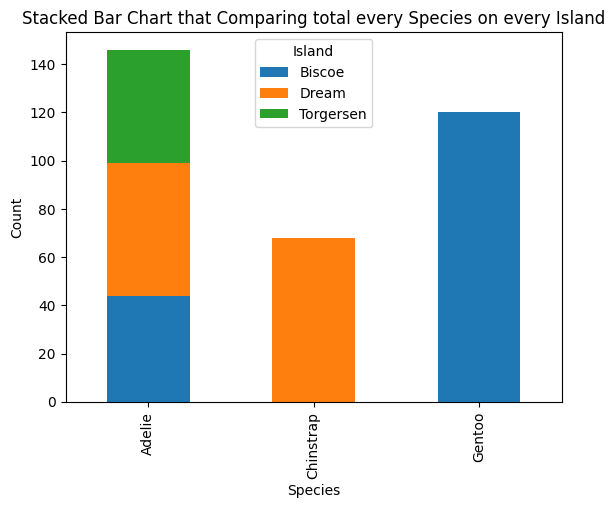

In [8]:
#6.1
species_counts = df.groupby(['species', 'island']).size().unstack()

# Plotting a stacked bar chart
species_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart that Comparing total every Species on every Island')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Island')
plt.show()

#from the bar plot we conclude that penguin (adelie) most found in Torgersen Island count above 140
#also we conclude that penguin (chinstrap) can only found in Dream island and penguin (gentoo) can only found in Biscoe Island

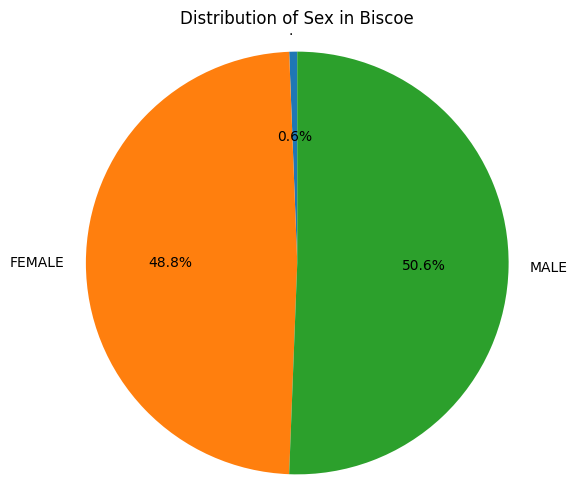

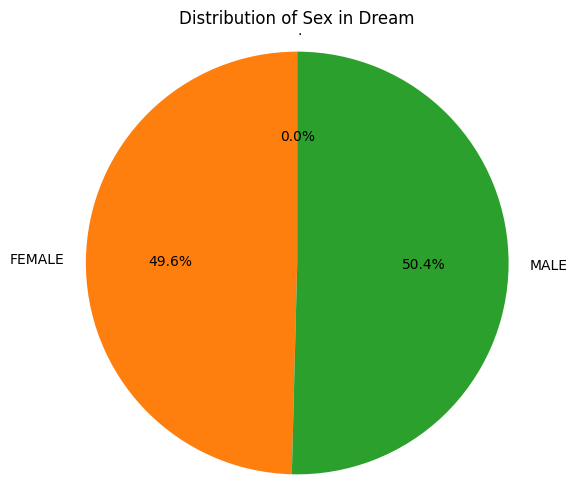

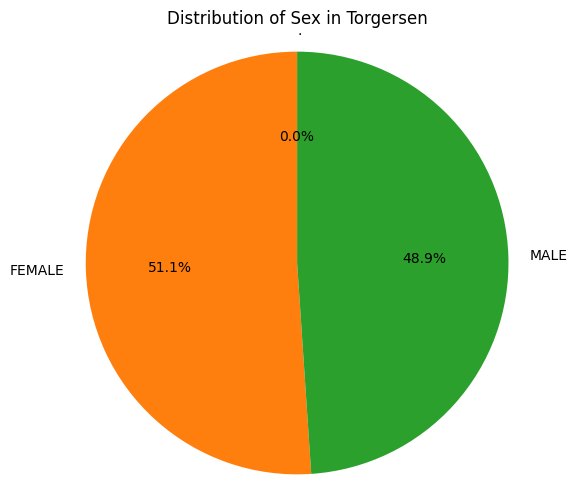

In [9]:
#6.2
count_sex = df.groupby(['island', 'sex']).size().unstack(fill_value=0)

for island in count_sex.index:
    plt.figure(figsize=(6, 6))
    plt.title(f'Distribution of Sex in {island}')
    plt.pie(count_sex.loc[island], labels=count_sex.columns, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

#the green one is Male
#the orange one is Female
#the blue has 0 values on column sex

7. Check unique value of our target variable

In [10]:
#7
for col in ['species']:
  print(df[col].unique())
#it shows the unique value or values in column species

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [11]:
#8
island_map = {'Torgersen': 1, 'Dream': 2, 'Biscoe': 3}
sex_map = {'MALE': 1, 'FEMALE': 2}

df['island'] = df['island'].map(island_map)
df['sex'] = df['sex'].map(sex_map)
df.head()

#this code is to encode the column of Island and Sex from string to integer

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,1,39.1,18.7,181.0,3750.0,1.0
1,Adelie,1,39.5,17.4,186.0,3800.0,2.0
2,Adelie,1,40.3,18.0,195.0,3250.0,2.0
4,Adelie,1,36.7,19.3,193.0,3450.0,2.0
5,Adelie,1,39.3,20.6,190.0,3650.0,1.0


9. encode the target column and display the results

In [12]:
#9
species_map = {'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}
df['species'] = df['species'].map(species_map)
df.head()
#this code is to encode the values of species from string to integer

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,1,39.1,18.7,181.0,3750.0,1.0
1,1,1,39.5,17.4,186.0,3800.0,2.0
2,1,1,40.3,18.0,195.0,3250.0,2.0
4,1,1,36.7,19.3,193.0,3450.0,2.0
5,1,1,39.3,20.6,190.0,3650.0,1.0


10. create a heatmap to see the correlation and explain the conclusion

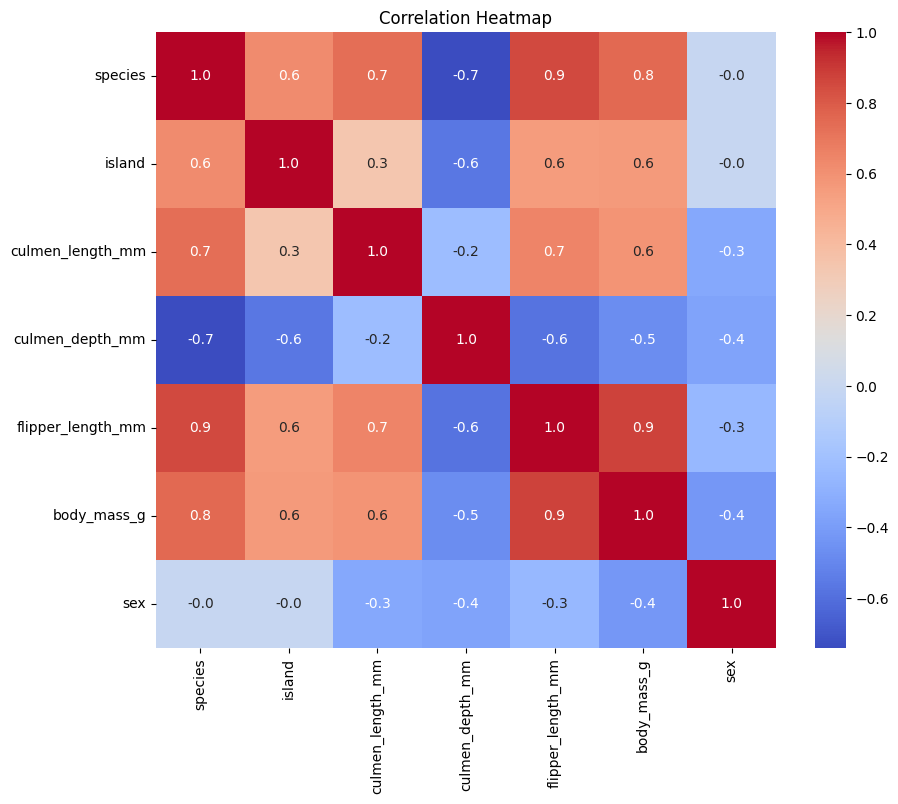

In [13]:
#10
correlation_matrix = df.corr() #calculate the correlation between numeric columns in the DataFrame df using the .corr() method
plt.figure(figsize=(10, 8)) #set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f") #create a heatmap using the previously calculated correlation matrix
plt.title("Correlation Heatmap") #title
plt.show() #display the heatmap


## Machine Learning

1. Splitting X and y

In [14]:
#1
x = df.drop(['species'], axis = 1)
y = df['species']

#this code is to splitting the dependent and independent
#and the dependent is on the variable y

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [15]:
#2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#test size 0,2 is 20%
#random state = 42 is the parameter

In [16]:
#3
x_train.shape, x_test.shape

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [17]:
#Criterion Entropy
#a
clf_entro = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf_entro.fit(x_train, y_train)

#the code shows the model of decision tree classifier

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [18]:
#b
y_pred_entro = clf_entro.predict(x_test)

#using the split data that i already done before

In [19]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entro)))

Model accuracy score with criterion entropy: 0.9701


In [20]:
#d
print('Training set score: {0:0.4f}' .format(clf_entro.score(x_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_entro.score(x_test, y_test)))

Training set score: 0.9625
Test set score: 0.9701


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(

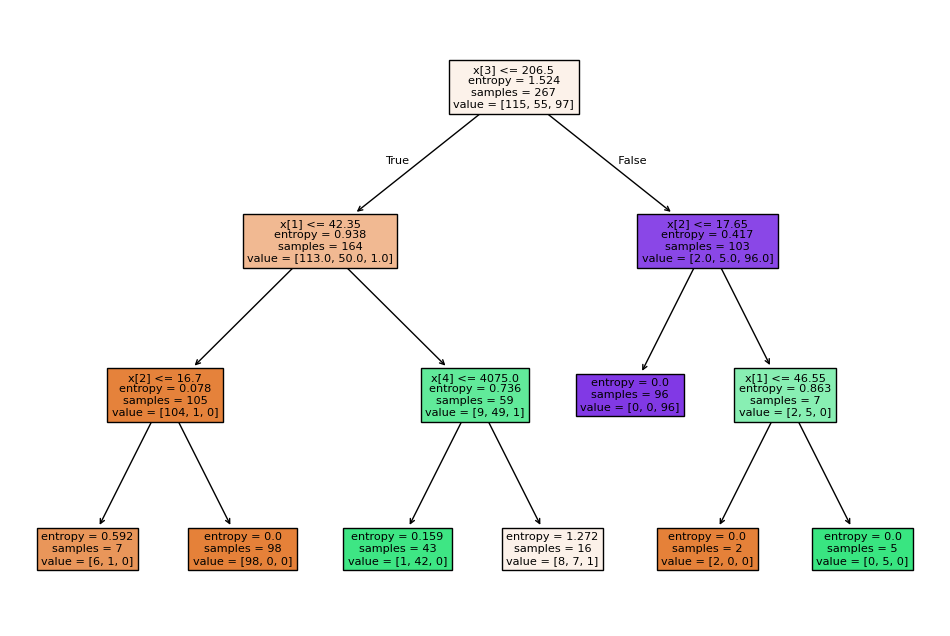

In [21]:
#e
plt.figure(figsize = (12,8))
tree.plot_tree(clf_entro.fit(x_train, y_train), filled = True)

2. Criterion Gini index

In [22]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [23]:
#b
y_pred_gini = clf_gini.predict(x_test)

#using the split data that i already done before

In [24]:
#c
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9851


In [25]:
#d
print('Training set score: {0:0.4f}' .format(clf_gini.score(x_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_gini.score(x_test, y_test)))

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2.0, 46.0, 1.0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 

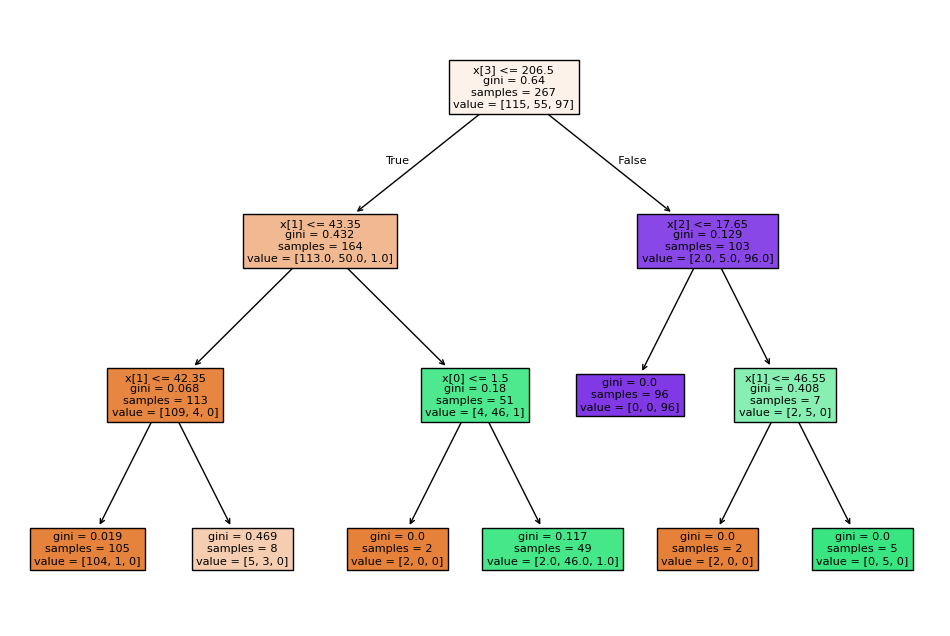

In [26]:
#e
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(x_train, y_train), filled = True)

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [27]:
#f
entropi = confusion_matrix(y_test, y_pred_entro)
gini = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix entropy: \n', entropi)
print('Confusion matrix gini index: \n', gini)

#it show the matrix of entropy and gini index

Confusion matrix entropy: 
 [[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Confusion matrix gini index: 
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [28]:
#g
print('Classification Report Entropy')
print(classification_report(y_test, y_pred_entro))
print('Classification Report Gini Index')
print(classification_report(y_test, y_pred_gini))

#the code shows the report on both side

Classification Report Entropy
              precision    recall  f1-score   support

           1       0.97      0.97      0.97        31
           2       0.92      0.92      0.92        13
           3       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Classification Report Gini Index
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [29]:
#h RESULT n CONCLUSION
#Gini has more accuracy based on the report with 99% / 0.99 above 2% with Entropy which has 97% / 0.97
#Based on the report we can see also that the the score of the recall in both side is almost perfect and same, it shows that the comparism of the class on both side is equal
#In the report both entropi and gini have a good result but the gini result slightly better than entropi so it indicates that gini may be more effective especially when focusing on specific class

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [30]:
#a
x_train = x_train.dropna()
y_train = y_train[x_train.index]

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [31]:
#b
nb_y_pred = nb_classifier.predict(x_test)

In [32]:
#c
print('Accuracy Score with GaussianNB: {0:0.1f}'.format(accuracy_score(y_test, nb_y_pred)))

#d

Gauss = confusion_matrix(y_test, nb_y_pred)
print('Confusion matrix GaussianNB: \n', Gauss)

print('Training set score: {0:0.4f}' .format(nb_classifier.score(x_train, y_train)))
print('Test set score: {0:0.4f}' .format(nb_classifier.score(x_test, y_test)))


Accuracy Score with GaussianNB: 1.0
Confusion matrix GaussianNB: 
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Training set score: 0.9586
Test set score: 1.0000


In [33]:
#e
print('Classification Report GaussianNB')
print(classification_report(y_test, nb_y_pred))

Classification Report GaussianNB
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [34]:
#f
#From the report we conclude that the accuracy score is 1.00 / 100%
#Precision, recall, and f1-score has 100$ score too
#This GaussianNB Model has the perfect prediction or score in this testing, with no classification or anything mistake.

Good Luck :)